<a href="https://colab.research.google.com/github/furqansidd/VG-Analysis/blob/main/VG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Data Preprocessing**

In [ ]:
data=pd.read_csv('/content/Video_Games.csv')
data.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14523,Guild Wars,PC,2005.0,Role-Playing,NCSoft,0.03,0.00,0.00,0.00,0.03,89.0,53.0,8.4,455.0,ArenaNet,T
9503,Barbie and the Three Musketeers,DS,2009.0,Adventure,Activision,0.12,0.00,0.00,0.01,0.13,NaN,NaN,tbd,NaN,WayForward,E
1885,Star Wars: Bounty Hunter,PS2,2002.0,Shooter,LucasArts,0.53,0.42,0.00,0.14,1.09,65.0,32.0,8.3,33.0,LucasArts,T
1821,Rabbids Go Home,Wii,2009.0,Platform,Ubisoft,0.25,0.74,0.00,0.14,1.12,78.0,50.0,8.3,32.0,Ubisoft Montpellier,E10+
16127,Katekyoo Hitman Reborn Nerae!? Ring x Bongole ...,PS2,2008.0,Adventure,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
# Count the number of null values in each column
null_values_count = data.isnull().sum()
null_values_count

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
df_cleaned= data.dropna(subset=['Name', 'Year_of_Release', 'Publisher'])
df_cleaned.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
df_cleaned['Critic_Score'].fillna(df_cleaned['Critic_Score'].mean(), inplace=True)
df_cleaned['Critic_Count'].fillna(df_cleaned['Critic_Count'].mean(), inplace=True)
df_cleaned['User_Count'].fillna(df_cleaned['User_Count'].mean(), inplace=True)

<ipython-input-10-496f1e22c347>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Critic_Score'].fillna(df_cleaned['Critic_Score'].mean(), inplace=True)
<ipython-input-10-496f1e22c347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Critic_Score'].fillna(df_cleaned['Critic_Score'].mean(), inplace=True)
<ipython-input-10

In [ ]:
df_cleaned.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,9.705292,13.254839,380.168417
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,68.997119,22.000000,30.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.997119,26.440992,163.008846
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.440992,163.008846
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


NA_Sales have biggest market cap in millions

# **Data Visualization**

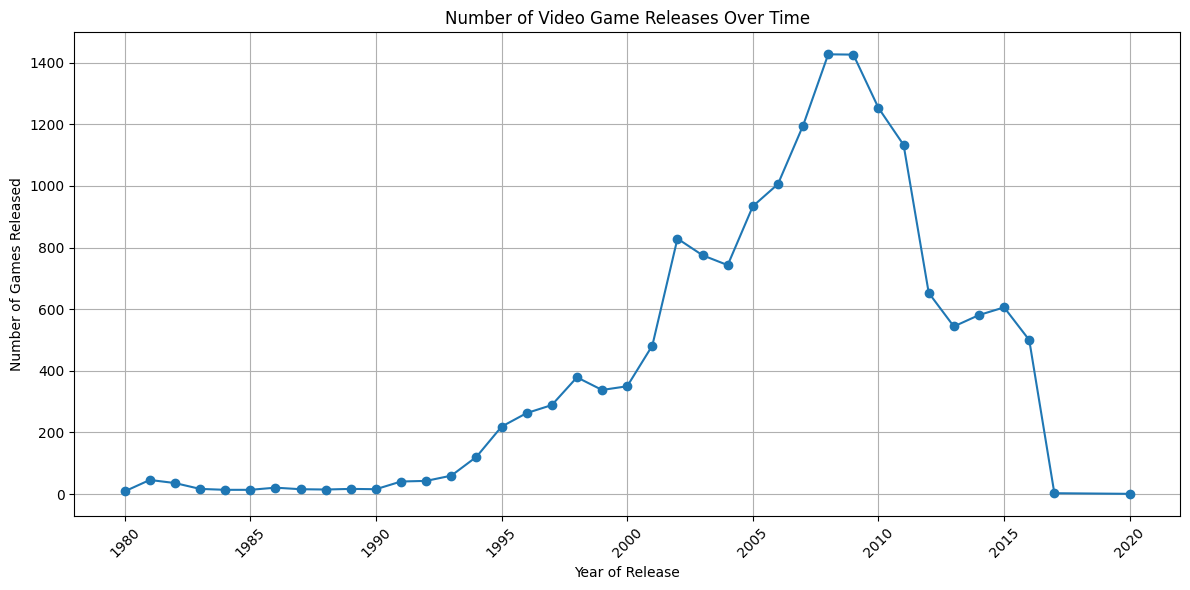

In [ ]:
# Group data by year and count the number of releases
releases_by_year = df_cleaned.groupby('Year_of_Release')['Name'].count()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(releases_by_year.index, releases_by_year.values, marker='o', linestyle='-') # Added marker and linestyle
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Number of Video Game Releases Over Time')
plt.xticks(rotation=45)
plt.grid(True) # Added grid for better readability
plt.tight_layout()
plt.show()


**interpret this graph**
The graph titled "Number of Video Game Releases Over Time" shows the trend in the number of video game releases from 1980 to 2020. Here are some key observations:

1980 to 1995: The number of video game releases remained relatively low and stable, with fewer than 200 games released each year.

1995 to 2000: There is a noticeable increase in the number of releases.

2000 onwards: A significant rise in releases, peaking around 2008-2009 with over 1300 games released in those years.

Post-2009: A sharp decline in the number of releases, with a significant drop after 2015, reaching a low point around 2020.

This graph highlights the growth and subsequent decline in the number of video game releases over four decades, reflecting trends and changes in the video game industry

In [ ]:
# Filter data for years 2008 and 2009
genre_2008_2009 = df_cleaned[(df_cleaned['Year_of_Release'] == 2008) | (df_cleaned['Year_of_Release'] == 2009)]

# Count the occurrences of each genre
genre_counts = genre_2008_2009['Genre'].value_counts()
print(genre_counts)

# Find the most popular genre
most_popular_genre = genre_counts.index[0]
print(f"The most popular genre between 2008 and 2009 was: {most_popular_genre}")

Genre
Action          493
Misc            418
Sports          383
Adventure       306
Simulation      242
Role-Playing    215
Shooter         173
Racing          166
Puzzle          143
Strategy        114
Fighting        109
Platform         91
Name: count, dtype: int64
The most popular genre between 2008 and 2009 was: Action


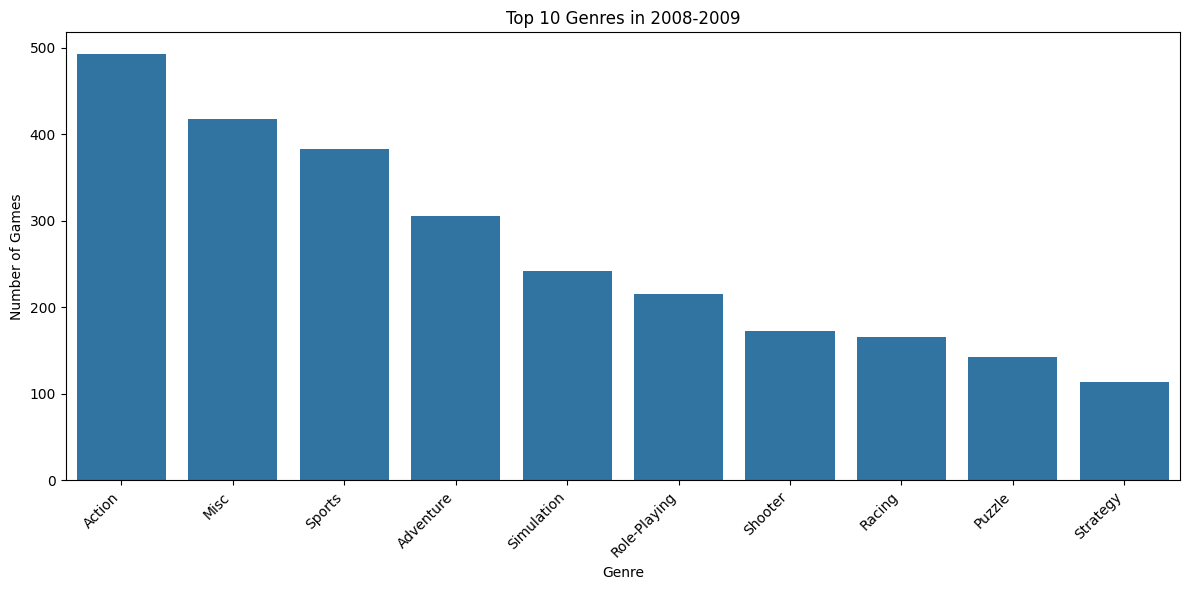

In [ ]:
# Get the top 10 genres
top_10_genres = genre_counts.head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Top 10 Genres in 2008-2009')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The bar chart titled **"Top 10 Genres in 2008-2009"** shows the number of games released for each genre during this period. Here are some key observations:

Action: Approximately 500 games, making it the most popular genre.

Misc: Around 450 games, the second most popular genre.

Sports: About 400 games, ranking third.

Adventure: Approximately 350 games.

Simulation: Around 300 games.

Role-Playing: About 250 games.

Shooter: Approximately 200 games.

Racing: Around 200 games.

Puzzle: About 150 games.

Strategy: Approximately 100 games, making it the least popular genre in this list.

This chart provides insight into the popularity of different game genres during 2008-2009, highlighting which genres had the most and least number of games released.

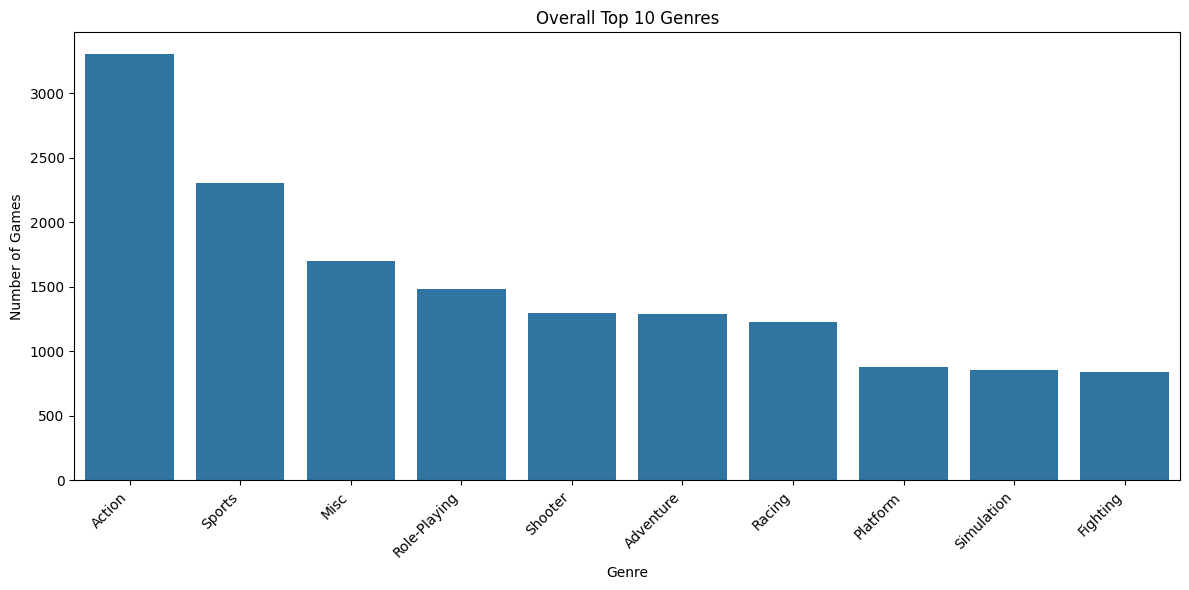

In [ ]:
# Get the top 10 genres overall
top_10_genres_overall = df_cleaned['Genre'].value_counts().head(10)

# Create the bar plot for overall top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres_overall.index, y=top_10_genres_overall.values)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Overall Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The image is a bar chart titled **"Overall Top 10 Genres."** It shows the number of games released for each of the top 10 genres. Here are the key observations:

Action: This genre has the highest number of games.

Sports: The second most popular genre.

Misc: The third most popular genre.

Role-Playing: Fourth in popularity.

Shooter: Fifth in the list.

Adventure: Sixth most popular.

Racing: Seventh in the ranking.

Platform: Eighth most popular.

Simulation: Ninth in the list.

Fighting: The least popular among the top 10 genres.

This chart provides a visual representation of the popularity or prevalence of different game genres, which can be relevant for market analysis, game development, and understanding consumer preferences.

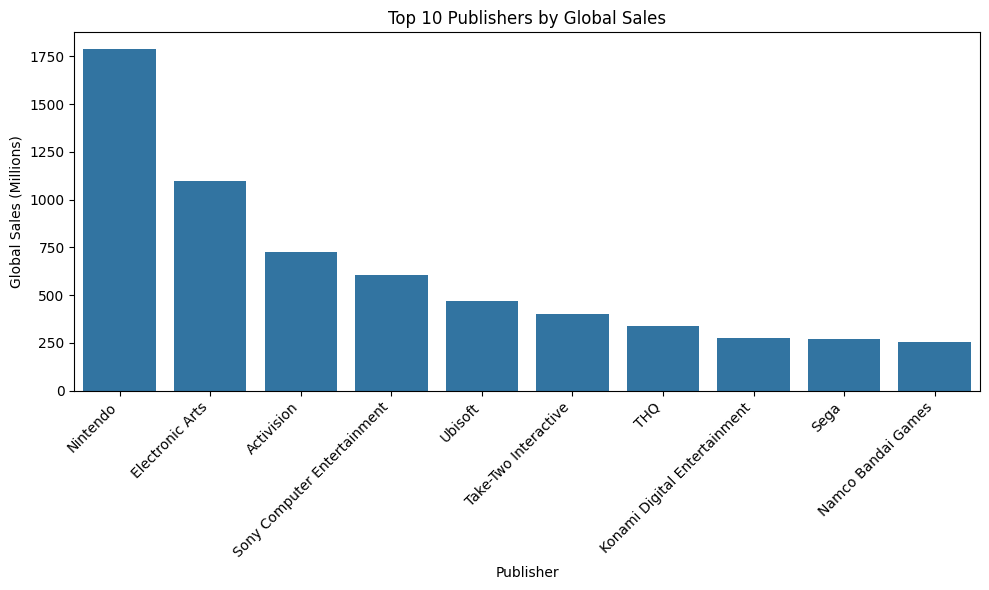

,Global_Sales
Publisher,
Nintendo,1786.72
Electronic Arts,1100.05
Activision,725.14
Sony Computer Entertainment,606.27
Ubisoft,470.45
Take-Two Interactive,403.58
THQ,338.11
Konami Digital Entertainment,277.36
Sega,268.11


In [ ]:
# Calculate global sales for each publisher
global_sales_by_publisher = df_cleaned.groupby('Publisher')['Global_Sales'].sum()

# Get the top 10 publishers by global sales
top_10_publishers = global_sales_by_publisher.sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values)
plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.title('Top 10 Publishers by Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_10_publishers

The image is a bar chart titled **"Top 10 Publishers by Global Sales."** It displays the global sales (in millions) of the top 10 video game publishers. Here are the key observations:

Nintendo: Leads with the highest global sales, exceeding 1750 million.

Electronic Arts: Follows with sales over 1000 million.

Activision: Ranks third.

Sony Computer Entertainment: Fourth in the list.

Ubisoft: Fifth in global sales.

Take-Two Interactive: Sixth.

THQ: Seventh.

Konami Digital Entertainment: Eighth.

Sega: Ninth.

Namco Bandai Games: Tenth, with sales just above 250 million.

This chart highlights the market dominance of these publishers, with Nintendo significantly leading in global sales.

In [ ]:
# Group data by platform and sum global sales
global_sales_by_platform = df_cleaned.groupby('Platform')['Global_Sales'].sum()

# Find the platform with the highest global sales
platform_with_highest_sales = global_sales_by_platform.idxmax()
highest_global_sales = global_sales_by_platform.max()

print(f"The platform with the most global sales is {platform_with_highest_sales} with ${highest_global_sales} million.")

The platform with the most global sales is PS2 with $1233.46 million.


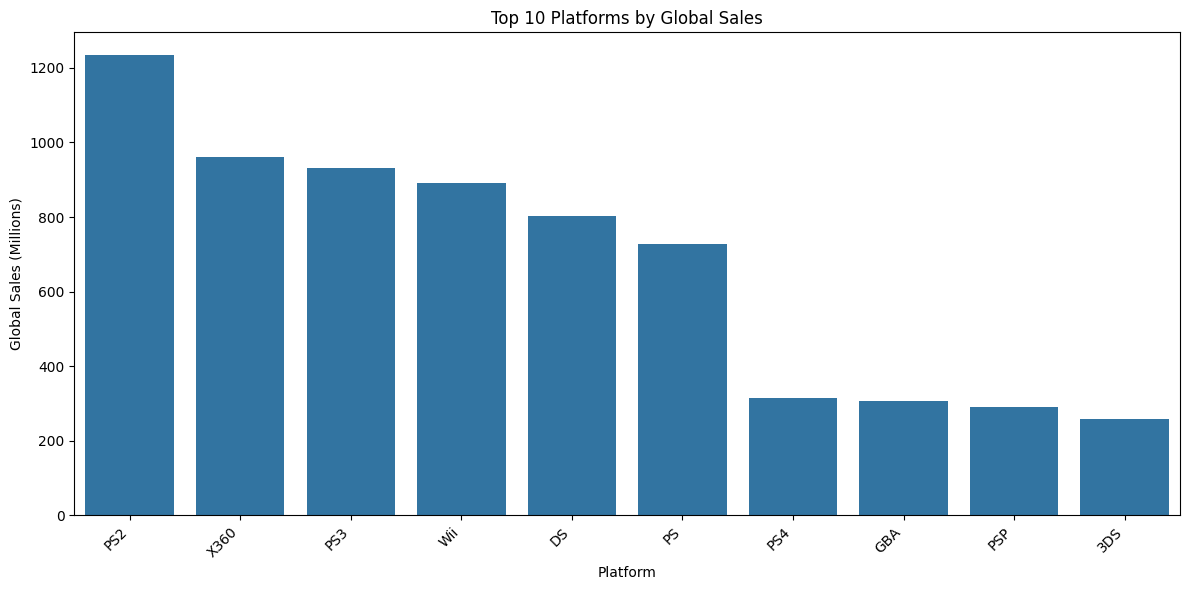

In [ ]:
# Get the top 10 platforms by global sales
top_10_platforms = global_sales_by_platform.sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_platforms.index, y=top_10_platforms.values)
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Top 10 Platforms by Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The image is a bar chart titled "Top 10 Platforms by Global Sales." It shows the global sales figures (in millions) for the top 10 gaming platforms. Here are the key observations:

PS2: Leads with the highest global sales, exceeding 1200 million units.

X360: Second highest, with significant sales.

PS3: Third in the ranking.

Wii: Fourth, with notable sales.

DS: Fifth in the list.

PS: Sixth highest sales.

PS4: Seventh in the ranking.

GBA: Eighth, with considerable sales.

PSP: Ninth in the list.

3DS: Tenth, with sales just above 200 million units.

This chart highlights the most successful gaming platforms in terms of global sales, providing insight into the popularity and market success of these consoles.

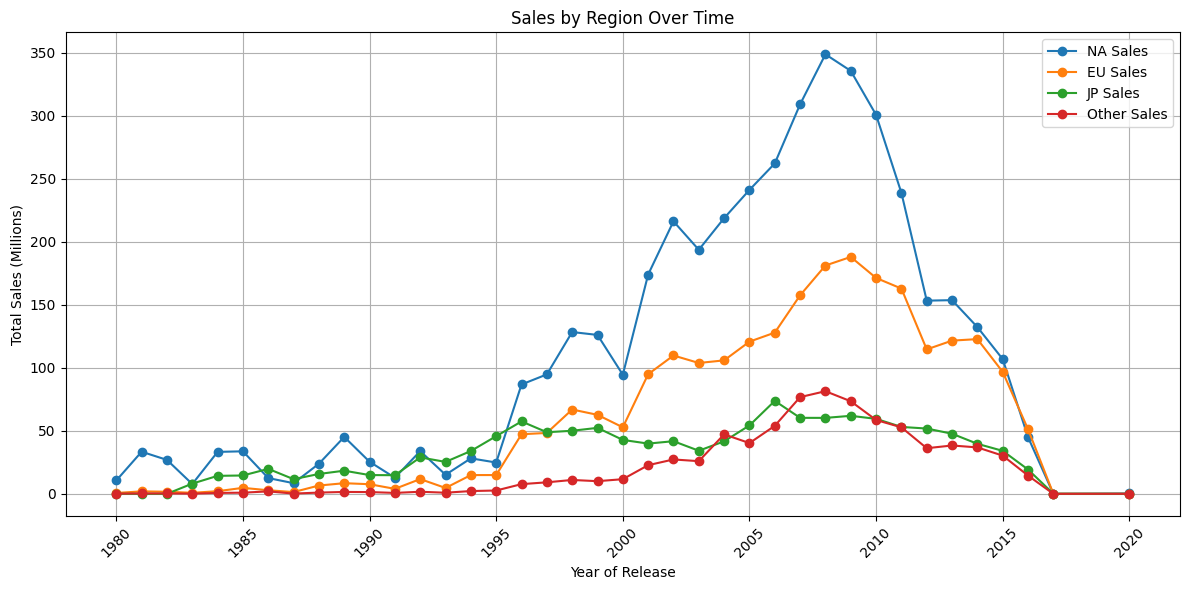

In [ ]:
# Group data by year and calculate the sum of sales for each region
sales_by_year = df_cleaned.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year['NA_Sales'], label='NA Sales', marker='o', linestyle='-')
plt.plot(sales_by_year.index, sales_by_year['EU_Sales'], label='EU Sales', marker='o', linestyle='-')
plt.plot(sales_by_year.index, sales_by_year['JP_Sales'], label='JP Sales', marker='o', linestyle='-')
plt.plot(sales_by_year.index, sales_by_year['Other_Sales'], label='Other Sales', marker='o', linestyle='-')

plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.title('Sales by Region Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The image is a line graph titled "Sales by Region Over Time." It shows the total sales (in millions) over time, categorized by different regions: NA Sales (North America), EU Sales (Europe), JP Sales (Japan), and Other Sales. Here are the key observations:

NA Sales (blue line): Significant increase starting around 1995, peaking around 2010, and then declining.

EU Sales (orange line): Also increased significantly starting around 2000, peaking around 2010, and then declining.

JP Sales (green line): Remained relatively stable with minor fluctuations.

Other Sales (red line): Showed a gradual increase with minor fluctuations.

This graph highlights the trends in sales across different regions over time, showing how sales have evolved and which regions have had the most significant changes.

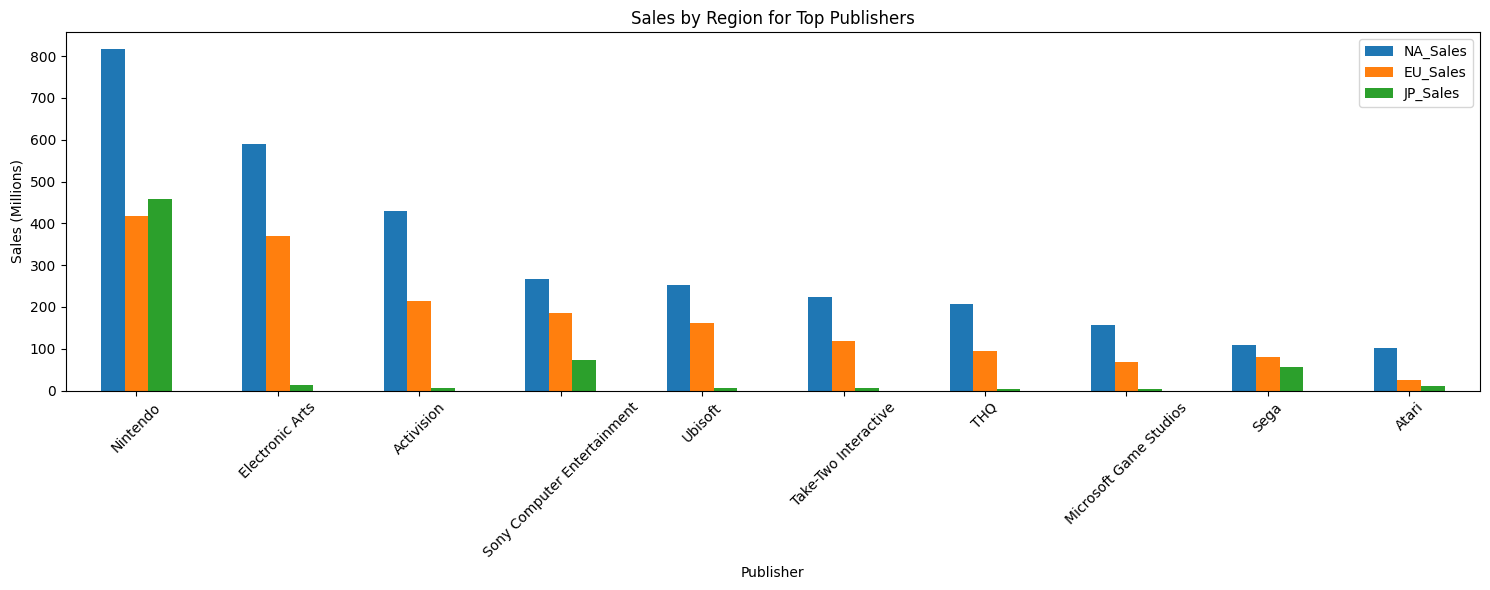

In [ ]:
# Assuming 'df_cleaned' is your DataFrame
sales_by_publisher = df_cleaned.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Select top N publishers (e.g., top 10)
top_publishers = sales_by_publisher.sort_values(by='NA_Sales', ascending=False).head(10)

# Create the grouped bar chart
top_publishers.plot(kind='bar', figsize=(15, 6))
plt.title('Sales by Region for Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The image is a bar chart titled "Sales by Region for Top Publishers." It shows the sales data for various video game publishers across three regions: North America (NA_Sales), Europe (EU_Sales), and Japan (JP_Sales). Here are the key observations:

Nintendo: Leads in sales across all three regions, with the highest sales in North America, followed by Europe and Japan.

Electronic Arts: Strong sales in North America and Europe, but minimal sales in Japan.

Activision: Similar pattern to Electronic Arts, with significant sales in North America and Europe, but low sales in Japan.

Sony Computer Entertainment: High sales in North America and Europe, with moderate sales in Japan.

Ubisoft: Strong sales in North America and Europe, but minimal sales in Japan.

Take-Two Interactive: Significant sales in North America and Europe, with minimal sales in Japan.

THQ: Similar pattern to Take-Two Interactive, with strong sales in North America and Europe, but low sales in Japan.

Microsoft Game Studios: High sales in North America, moderate sales in Europe, and minimal sales in Japan.

Sega: Moderate sales in North America and Europe, with higher sales in Japan compared to other publishers.

Atari: Lower sales across all three regions compared to other publishers.

This chart highlights the regional sales distribution for top video game publishers, showing which companies dominate in specific markets. Nintendo stands out as the leader in all regions, while other publishers have varying levels of success depending on the region.

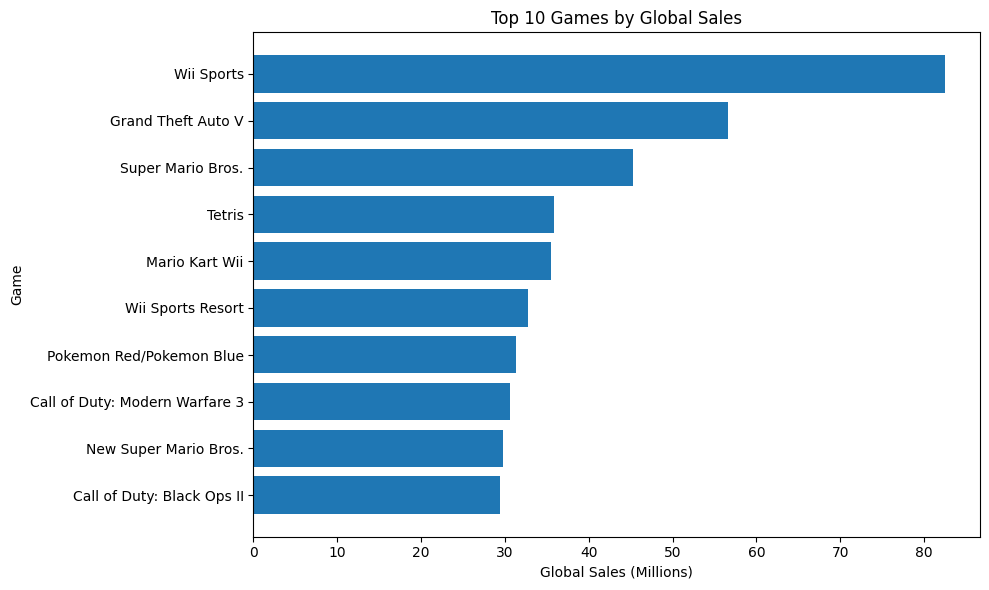

In [ ]:
# Calculate global sales for each game
global_sales_by_game = df_cleaned.groupby('Name')['Global_Sales'].sum()

# Get the top 10 games by global sales
top_10_games = global_sales_by_game.sort_values(ascending=False).head(10)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_games.index, top_10_games.values)
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game')
plt.title('Top 10 Games by Global Sales')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest sales at the top
plt.tight_layout()
plt.show()

The image is a horizontal bar chart titled "Top 10 Games by Global Sales." It lists the top 10 video games based on their global sales in millions. Here are the key observations:

Wii Sports: Leads with approximately 82 million sales.

Grand Theft Auto V: Second with around 55 million sales.

Super Mario Bros.: Third with about 40 million sales.

Tetris: Fourth with approximately 35 million sales.

Mario Kart Wii: Fifth with around 33 million sales.

Wii Sports Resort: Sixth with about 33 million sales.

Pokemon Red/Pokemon Blue: Seventh with approximately 31 million sales.

Call of Duty: Modern Warfare 3: Eighth with around 30 million sales.

New Super Mario Bros.: Ninth with about 30 million sales.

Call of Duty: Black Ops II: Tenth with approximately 29 million sales.

This chart highlights the most successful video games in terms of global sales, showcasing the popularity and market success of these titles.

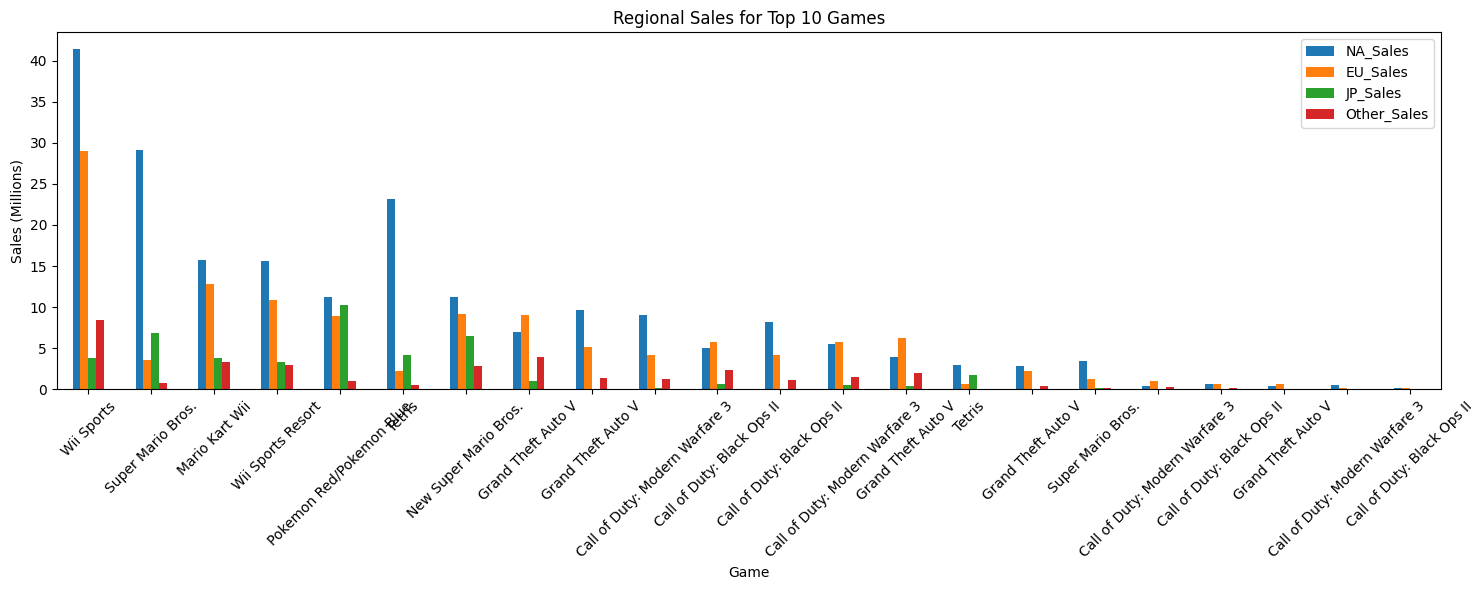

In [ ]:
# Calculate regional sales for the top 10 games
top_10_games_regional = df_cleaned[df_cleaned['Name'].isin(top_10_games.index)][['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Create the grouped bar chart
top_10_games_regional.plot(x='Name', kind='bar', figsize=(15, 6))
plt.title('Regional Sales for Top 10 Games')
plt.xlabel('Game')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The image is a bar chart titled "Regional Sales for Top 10 Games." It shows the sales data for the top 10 video games across four regions: North America (NA_Sales), Europe (EU_Sales), Japan (JP_Sales), and Other regions (Other_Sales). Here are the key observations:

Wii Sports: Leads in sales across all regions, with the highest sales in North America.

Super Mario Bros.: Strong sales in North America and Europe, moderate in Japan and Other regions.

Mario Kart Wii: High sales in North America and Europe, moderate in Japan and Other regions.

Wii Sports Resort: Significant sales in North America and Europe, moderate in Japan and Other regions.

Pokemon Red/Pokemon Blue: Strong sales in North America and Japan, moderate in Europe and Other regions.

Tetris: High sales in North America and Europe, moderate in Japan and Other regions.

New Super Mario Bros.: Strong sales in North America and Europe, moderate in Japan and Other regions.

Grand Theft Auto V: High sales in North America and Europe, moderate in Japan and Other regions.

Call of Duty: Modern Warfare 3: Significant sales in North America and Europe, moderate in Japan and Other regions.

Call of Duty: Black Ops II: Strong sales in North America and Europe, moderate in Japan and Other regions.

This chart highlights the regional popularity and market success of these top video games, showing how sales vary across different regions.

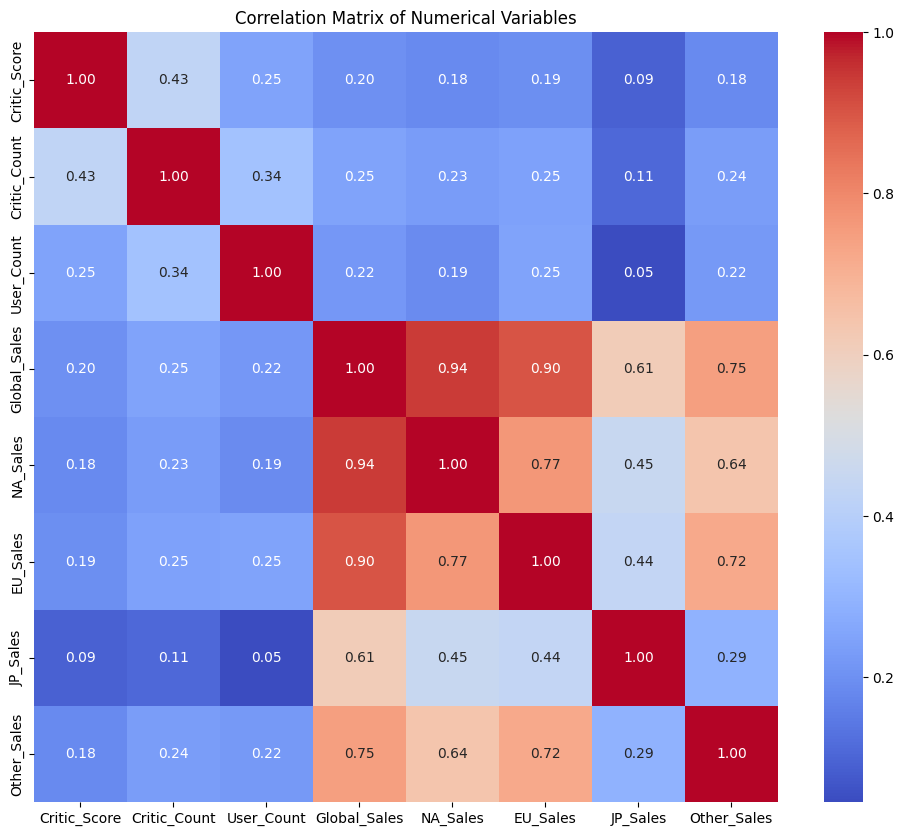

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = ['Critic_Score', 'Critic_Count', 'User_Count', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
correlation_data = df_cleaned[numerical_cols].dropna() # Drop rows with any NaN values in these columns


# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


The image is a correlation matrix of numerical variables related to video game sales and reviews. The variables included are Critic_Score, Critic_Count, User_Count, Global_Sales, NA_Sales, EU_Sales, JP_Sales, and Other_Sales. The matrix uses a color gradient from blue (indicating low or negative correlation) to red (indicating high positive correlation) to show the strength of the relationships between these variables. The values in each cell represent the correlation coefficient between the corresponding variables.

Interpretation of Global_Sales as the Dependent Variable
Global_Sales and NA_Sales: The correlation coefficient is 0.94, indicating a very strong positive correlation. This suggests that higher sales in North America are strongly associated with higher global sales.

Global_Sales and EU_Sales: The correlation coefficient is 0.90, also indicating a very strong positive correlation. This suggests that higher sales in Europe are strongly associated with higher global sales.

Global_Sales and Other_Sales: The correlation coefficient is 0.75, indicating a strong positive correlation. This suggests that higher sales in other regions are associated with higher global sales.

Global_Sales and JP_Sales: The correlation coefficient is 0.61, indicating a moderate positive correlation. This suggests that higher sales in Japan are moderately associated with higher global sales.

Global_Sales and Critic_Count: The correlation coefficient is 0.25, indicating a weak positive correlation. This suggests that a higher number of critic reviews is weakly associated with higher global sales.

Global_Sales and User_Count: The correlation coefficient is 0.22, indicating a weak positive correlation. This suggests that a higher number of user reviews is weakly associated with higher global sales.

Global_Sales and Critic_Score: The correlation coefficient is 0.20, indicating a weak positive correlation. This suggests that higher critic scores are weakly associated with higher global sales.

**In summary, the strongest predictors of Global_Sales are NA_Sales and EU_Sales, followed by Other_Sales and JP_Sales. The number of critic and user reviews, as well as the critic scores, have a weaker association with global sales.**


# **MULTIPLE LINEAR REGRESSION MODEL**

Mean Squared Error: 2.7191053227084223e-05
R-squared: 0.9999935790365084


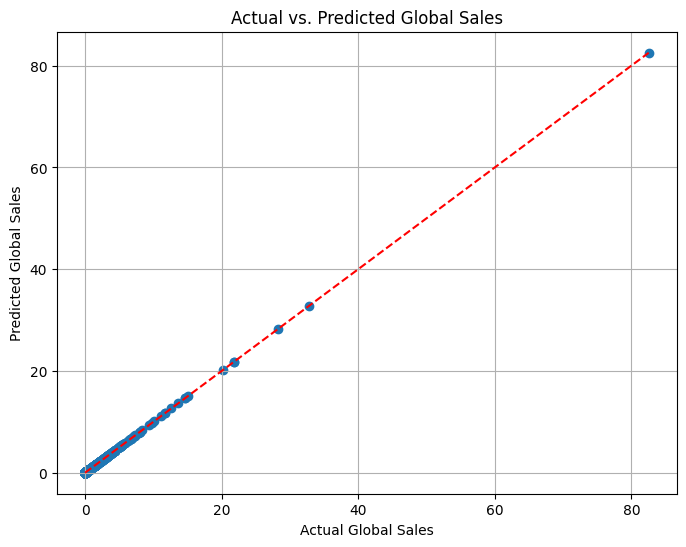

In [ ]:
# Prepare the data
X = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = df_cleaned['Global_Sales'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs. Predicted Global Sales")
plt.grid(True)
plt.show()

Based on the correlation matrix, you should include the following variables as predictors in your model:

**NA_Sales (North America Sales)**

**EU_Sales (Europe Sales)**

**Other_Sales (Other regions Sales)**

***JP_Sales (Japan Sales)***

*These variables have strong positive correlations with Global_Sales, making them suitable predictors for your model. By excluding the weakly correlated variables, you can simplify the model and potentially improve its performance.*

**Mean Squared Error (MSE): 2.7191053227084223e-05**

This value is very low, indicating that the model's predictions are very close to the actual values. A lower MSE signifies better model performance.

**R-squared (R²): 0.9999935790365084**

This value is extremely close to 1, suggesting that the model explains nearly all the variability in the dependent variable (Global_Sales). An R² value close to 1 indicates a very good fit for the model.

# **Hypothesis Testings**

In [ ]:
# prompt: . Release Year vs. Game Success
# Hypothesis:
# Null Hypothesis (H₀): The year of release has no significant effect on the success (global sales) of games.
# Alternative Hypothesis (H₁): The year of release has a significant effect on the success (global sales) of games.
# Test: ANOVA

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Assuming 'df_cleaned' is your DataFrame
# and 'Global_Sales' is your target variable and 'Year_of_Release' is your independent variable

# Fit the ANOVA model
model = smf.ols('Global_Sales ~ C(Year_of_Release)', data=df_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(Year_of_Release),1014.954165,38.0,11.236986,2.716153e-66
Residual,38926.678940,16377.0,NaN,NaN


**Interpretation:**  
The F-statistic of 11.236986 and the extremely low p-value (2.716153e-66) indicate that the year of release has a significant effect on the success (global sales) of games.

Therefore, we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁).

This means that the year of release significantly impacts the global sales of games.

In [ ]:
# prompt: Genre vs. Platform
# Hypothesis:
# Null Hypothesis (H₀): The choice of genre is independent of the platform.
# Alternative Hypothesis (H₁): The choice of genre depends on the platform.
# Data: Create a contingency table with genres as rows and platforms as columns. and perform chi square test and interpret result

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_cleaned['Genre'], df_cleaned['Platform'])
#print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
#print("Expected frequencies:", expected)

# Interpret the results
alpha = 0.05  # Set significance level

print("\nInterpretation:")
if p < alpha:
    print("Reject the null hypothesis (H₀).")
    print("There is evidence that the choice of genre depends on the platform.")
else:
    print("Fail to reject the null hypothesis (H₀).")
    print("There is no significant evidence that the choice of genre depends on the platform.")

Chi-square statistic: 5916.407372345932
P-value: 0.0
Degrees of freedom: 330

Interpretation:
Reject the null hypothesis (H₀).
There is evidence that the choice of genre depends on the platform.
